### Welcome to the LogView Filtering & Additional Visualization Functions Tutorial

Welcome! This tutorial will guide you through using the **LogView** framework to filter event logs, and use additional visualization functions to gain insights into that filtering process.

### About LogView

**LogView** is an existing framework introduced in the following publication:

> **Zerbato, F., Franceschetti, M., & Weber, B. (2024)**  
> *A Framework to Support the Validation of Process Mining Inquiries*.  
> In: *Business Process Management Forum: BPM 2024 Forum, Krakow, Poland, September 1–6, 2024, Proceedings*. Lecture Notes in Business Information Processing (LNBIP), Vol. 526, Springer, pp. 249–266.

LogView supports the systematic evaluation of filtering logic and traceability in process mining experiments.

### What is New?

While LogView itself provides the query engine and lineage tracking, this tutorial introduces a **new set of visualization functions** to make the filtering process more transparent and insightful:

- `icicle()`: Visualizes entire filter sequences as a hierarchical structure.
- `pie()`: Shows how a specific filter applies across the event log and how it affects various branches.

### Imports & Setup

Import all necessary libraries and custom functions:

In [1]:
import os
import zipfile
import pandas as pd
import pm4py
from logview.utils import LogViewBuilder
from logview.predicate import *
from filter_visualization import icicle, pie
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

### Load and Prepare Event Log

Then load your event log and format it for analysis with PM4Py. The code below does this for the BPI Challenge 2017 dataset:


In [ ]:
# Load data

csv_file = "BPI_Challenge_2017.csv"
zip_file = "BPI_Challenge_2017.zip"

if not os.path.exists(csv_file):
    if os.path.exists(zip_file):
        print(f"Extracting {csv_file} from {zip_file}...")
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extract(csv_file)
    else:
        raise FileNotFoundError(f"Both '{csv_file}' and '{zip_file}' not found")
    
CASE_ID_COL = 'case'
TIMESTAMP_COL = 'time'
ACTIVITY_COL = 'event'
    
bpi_data = pd.read_csv(csv_file, sep=',', quotechar='"')
bpi_data.columns = bpi_data.columns.str.strip()
bpi_data[TIMESTAMP_COL] = pd.to_datetime(bpi_data[TIMESTAMP_COL], format='%Y/%m/%d %H:%M:%S.%f')
log = pm4py.format_dataframe(bpi_data, case_id=CASE_ID_COL, activity_key=ACTIVITY_COL, timestamp_key=TIMESTAMP_COL)

display(log)

case                    event  \
0        Application_1000086665     A_Create Application   
1        Application_1000086665              A_Submitted   
2        Application_1000086665           W_Handle leads   
3        Application_1000086665           W_Handle leads   
4        Application_1000086665   W_Complete application   
...                         ...                      ...   
1202262   Application_999993812  W_Call incomplete files   
1202263   Application_999993812  W_Call incomplete files   
1202264   Application_999993812               O_Accepted   
1202265   Application_999993812                A_Pending   
1202266   Application_999993812  W_Call incomplete files   

                                    time lifecycle:transition ApplicationType  \
0       2016-08-03 17:57:21.673000+00:00             COMPLETE      New credit   
1       2016-08-03 17:57:21.734000+00:00             COMPLETE      New credit   
2       2016-08-03 17:57:21.963000+00:00             SCHEDULE      New credit   
3       2016-08-03 17:58:28.286000+00:00             WITHDRAW      New credit   
4       2016-08-03 17:58:28.293000+00:00             SCHEDULE      New credit   
...                                  ...                  ...             ...   
1202262 2016-10-20 10:19:28.812000+00:00               RESUME      New credit   
1202263 2016-10-20 10:21:59.667000+00:00              SUSPEND      New credit   
1202264 2016-10-24 08:24:30.056000+00:00             COMPLETE      New credit   
1202265 2016-10-24 08:24:30.059000+00:00             COMPLETE      New credit   
1202266 2016-10-24 08:24:30.061000+00:00            ATE_ABORT      New credit   

                       LoanGoal  RequestedAmount  MonthlyCost org:resource  \
0        Other, see explanation           5000.0          NaN       User_1   
1        Other, see explanation           5000.0          NaN       User_1   
2        Other, see explanation           5000.0          NaN       User_1   
3        Other, see explanation           5000.0          NaN       User_1   
4        Other, see explanation           5000.0          NaN       User_1   
...                         ...              ...          ...          ...   
1202262        Caravan / Camper          30000.0          NaN      User_41   
1202263        Caravan / Camper          30000.0          NaN      User_41   
1202264        Caravan / Camper          30000.0          NaN      User_68   
1202265        Caravan / Camper          30000.0          NaN      User_68   
1202266        Caravan / Camper          30000.0          NaN      User_68   

        Selected  ... Accepted CreditScore  NumberOfTerms  EventOrigin  \
0            NaN  ...      NaN         NaN            NaN  Application   
1            NaN  ...      NaN         NaN            NaN  Application   
2            NaN  ...      NaN         NaN            NaN     Workflow   
3            NaN  ...      NaN         NaN            NaN     Workflow   
4            NaN  ...      NaN         NaN            NaN     Workflow   
...          ...  ...      ...         ...            ...          ...   
1202262      NaN  ...      NaN         NaN            NaN     Workflow   
1202263      NaN  ...      NaN         NaN            NaN     Workflow   
1202264      NaN  ...      NaN         NaN            NaN        Offer   
1202265      NaN  ...      NaN         NaN            NaN  Application   
1202266      NaN  ...      NaN         NaN            NaN     Workflow   

        OfferedAmount       case:concept:name             concept:name  \
0                 NaN  Application_1000086665     A_Create Application   
1                 NaN  Application_1000086665              A_Submitted   
2                 NaN  Application_1000086665           W_Handle leads   
3                 NaN  Application_1000086665           W_Handle leads   
4                 NaN  Application_1000086665   W_Complete application   
...               ...                     ...                  

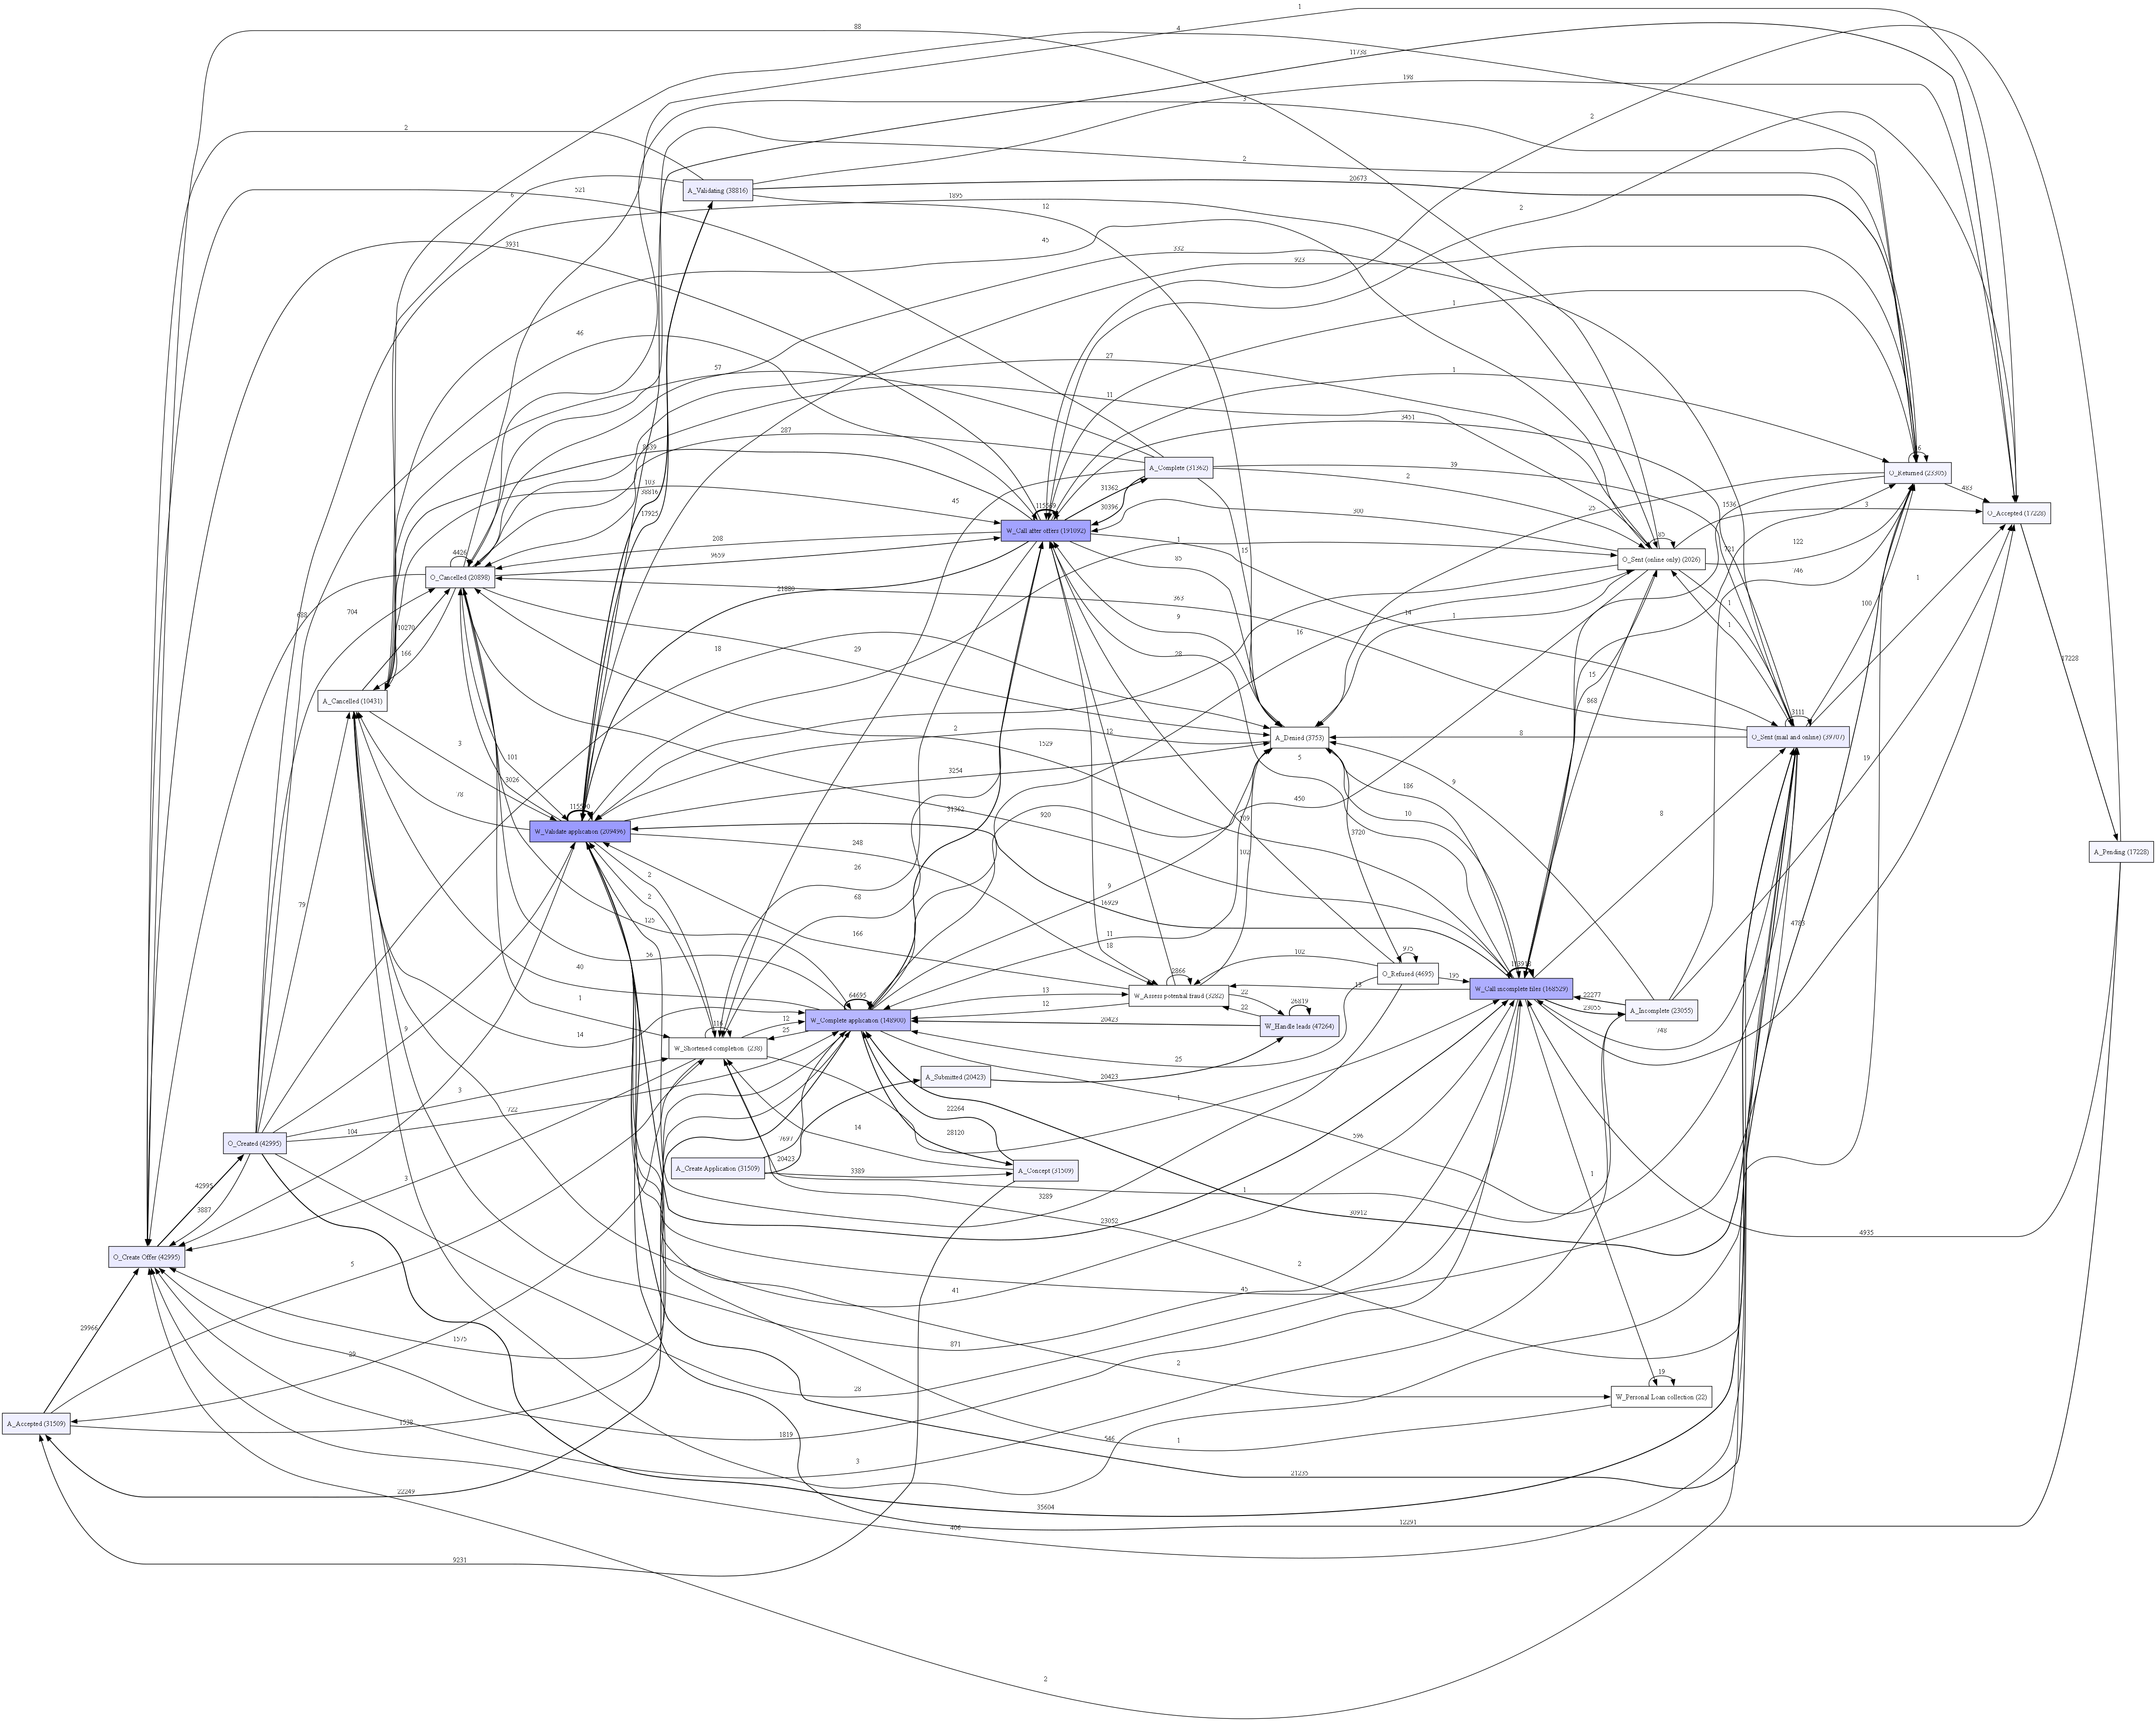

In [3]:
# Visualize the DFG
dfg = dfg_discovery.apply(log)
gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)

### Instantiating a LogView object ###
The LogViewBuilder class allows instantiating a LogView object, which serves as the central interface for creating LogView instances. It provides a single point of access for interacting with the different framework components.

In [4]:
# Build LogView
log_view = LogViewBuilder.build_log_view(log)

### Evaluate Queries ###

In **LogView**, a _query_ is a combination (conjunction) of one or more predicates, which are similar to case filters. 
Predicates allow you to retrieve cases from the log that meet the conditions specified by the predicate. For example, a predicate such as 'amount ≤ 100' sets a condition on the values of the 'amount' attribute within the case.

### Query Predicates ###
The following predicates are currently supported in LogView.

**Filter on attribute values:**
- `EqToConstant`: Keeps cases that contain at least an event with the given attribute equal to a constant value.
- `NotEqToConstant`: Keeps cases that do not contain any event with the given attribute equal to a constant value.
- `GreaterEqualToConstant`: Keeps cases that contain at least an event with the given attribute greater than or equal to a constant value.
- `GreaterThanConstant`: Keeps cases that contain at least an event with the given attribute greater than a constant value.
- `LessEqualToConstant`: Keeps cases that contain at least an event with the given attribute lower than or equal to a constant value.
- `LessThanConstant`: Keeps cases that contain at least an event with the given attribute lower than a constant value.
- `StartWith`: Keeps cases starting with the specified activities.
- `EndWith`: Keeps cases ending with a given activity.
- `DurationWithin`: Keeps cases with durations within a specified range in seconds.

**Union**
- `Union`: represents a logical OR operation between multiple predicates. 

Examples: 

- `EndWith(['Send Fine', 'Appeal to Judge'])` retrieves all the cases that end with activity 'Send Fine' or 'Appeal to Judge'.
- `LessEqualToConstant('amount', '100')` retrieves all the cases where there is at least an event with attribute amount ≤ 100.

In [5]:
# CreditScore ≥ 600
query_1 = Query('GoodCredit', [GreaterEqualToConstant('CreditScore', 600)])
result_set_1, complement_1 = log_view.evaluate_query('rs_GoodCredit', log, query_1)

# RequestedAmount ≥ 10000
query_2 = Query('LoanOverThreshold', [GreaterEqualToConstant('RequestedAmount', 10000)])
result_set_2, complement_2 = log_view.evaluate_query('rs_LoanOverThreshold', result_set_1, query_2)

# RequestedAmount < 15000
query_3 = Query('SmallAmount', [LessThanConstant('RequestedAmount', 15000)])
result_set_3, complement_3 = log_view.evaluate_query('rs_SmallAmount', result_set_2, query_3)

# ApplicationType = 'New credit'
query_4 = Query('IsNewCredit', [EqToConstant('ApplicationType', 'New credit')])
result_set_4, complement_4 = log_view.evaluate_query('rs_IsNewCredit', result_set_3, query_4)

In [ ]:
# It is possible to start another analysis on the source log, this wil also be added to the same LogView object, but can be used seperately later on:

# Starts with A_Create Application
query_5 = Query('StartWithCreate', [StartWith(['A_Create Application'])])
result_set_5, complement_5 = log_view.evaluate_query('rs_StartWithCreate', log, query_5)

# Duration between 2 and 7 days
query_6 = Query('ModerateDuration', [DurationWithin(172800, 604800)])
result_set_6, complement_6 = log_view.evaluate_query('rs_ModerateDuration', result_set_5, query_6)

### General Form ##

```python
query_name = Query('QueryLabel', [ConditionFunction(field, value)])
result_set, complement = log_view.evaluate_query('ResultSetName', input_log, query_name)


In [ ]:
# Practice writing your own Query:


### View the Registry ###
The **Registry** is the backbone of the framework, allowing users to record queries made during analysis, along with their evaluations by the **Query Evaluator**.\
The registry also facilitates access to all recorded information.

The user can access the registry at any time during the analysis using the following method.

In the summary view, each applied query is listed along with:

- The **source log** it was applied to
- The **result set** it produced

This creates a clear **lineage**: Every result set is derived from a parent log, which may itself be the output of a previous query. This chain continues recursively, all the way back to the **original source log** provided when creating the `log_view` object.

In [ ]:
summary = log_view.get_summary()

+----+----------------------+-------------------+----------------------+----------+
|    | source_log           | query             | result_set           | labels   |
|----+----------------------+-------------------+----------------------+----------|
|  0 | initial_source_log   | GoodCredit        | rs_GoodCredit        | []       |
|  1 | rs_GoodCredit        | LoanOverThreshold | rs_LoanOverThreshold | []       |
|  2 | rs_LoanOverThreshold | SmallAmount       | rs_SmallAmount       | []       |
|  3 | rs_SmallAmount       | IsNewCredit       | rs_IsNewCredit       | []       |
|  4 | initial_source_log   | StartWithCreate   | rs_StartWithCreate   | []       |
|  5 | rs_StartWithCreate   | ModerateDuration  | rs_ModerateDuration  | []       |
+----+----------------------+-------------------+----------------------+----------+
+----+-------------------+----------------------------------------+
|    | query             | predicates                             |
|----+------------------

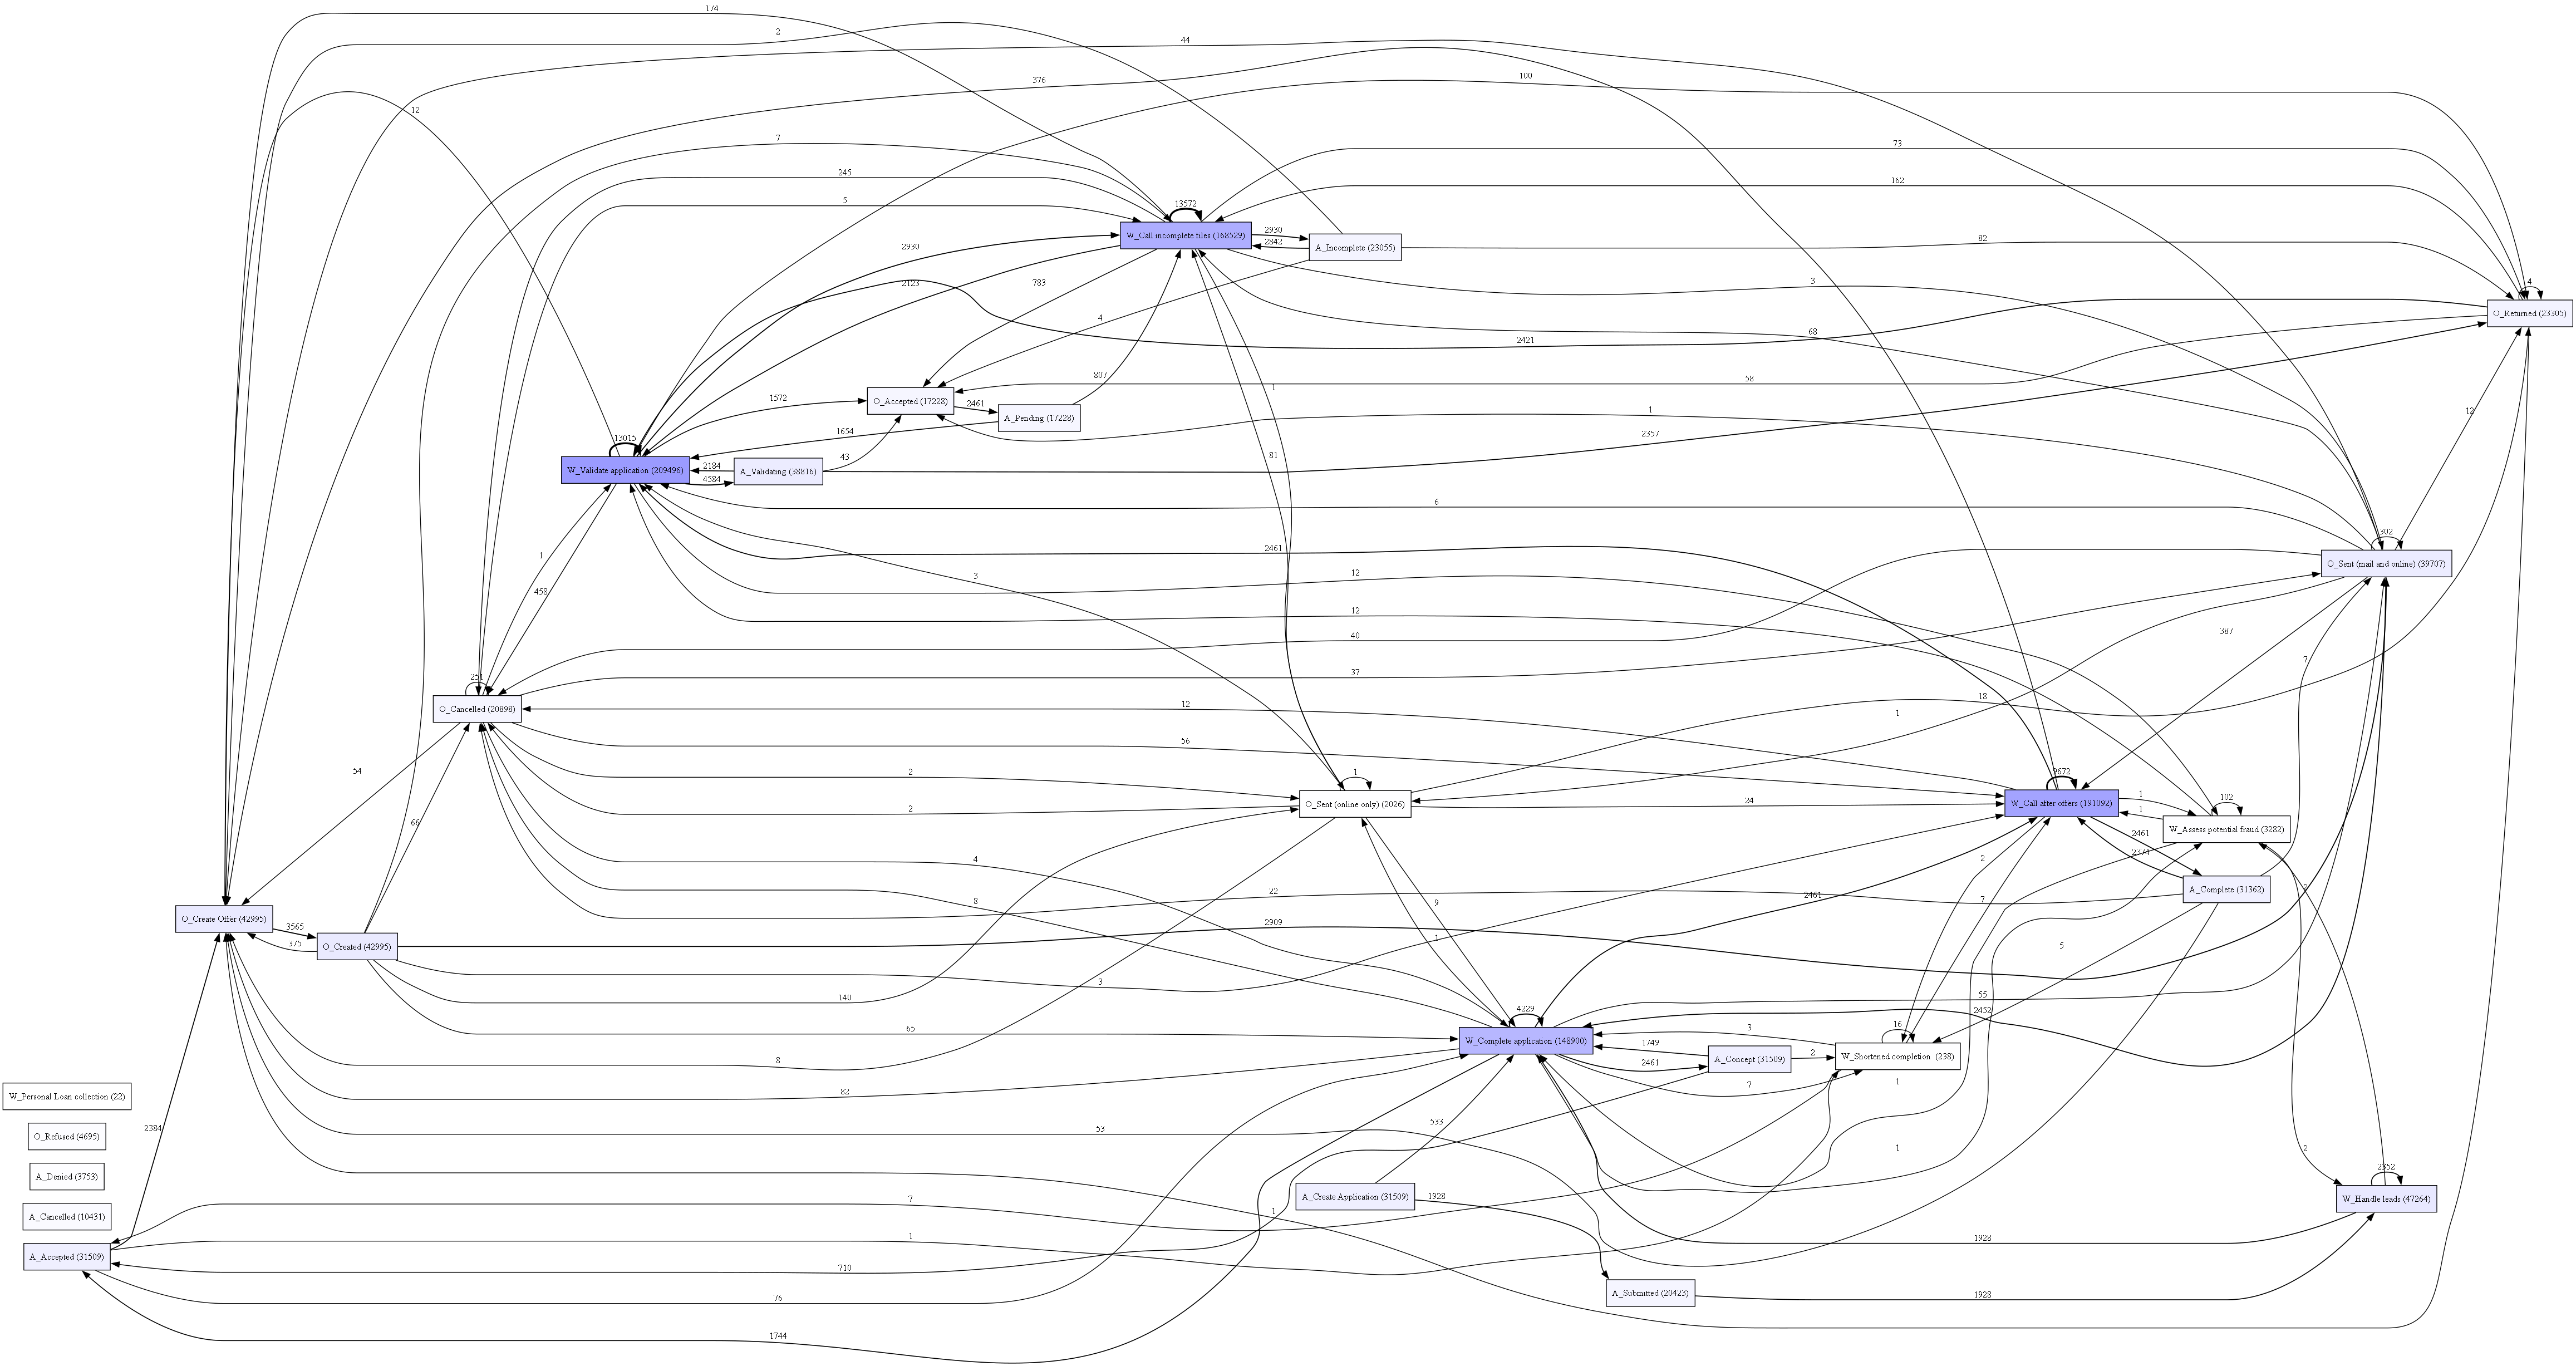

In [ ]:
# Visualize the DFG after the first four filters
dfg = dfg_discovery.apply(result_set_4)
gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)

### The `icicle()` Function ###

The `icicle()` function visualizes how a specific result set was derived from a sequence of filters applied to the event log. It builds an **icicle chart** that shows the hierarchical filtering steps and metrics for each resulting subset.

Function Signature:
```python
icicle(result_set_name, log_view, metric="avg_case_duration_seconds", show_time=False, details=True)

### `icicle()` Function Parameters

| Parameter         | Type      | Description                                                                                                                                                                  |
|------------------|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `result_set_name`| `str`     | The name of the result set you want to visualize. This must match the name used when calling `log_view.evaluate_query(...)`. Any name in the list of "result_set" names can be used to call the function. |
| `log_view`       | `LogView` | A `LogView` object that stores the original event log along with all filtering steps applied. Created using `LogViewBuilder.build_log_view(log)`.                           |
| `metric`         | `str`     | The metric to visualize in the chart. Supported options:<br> • `"avg_case_duration_seconds"` (default)<br> • `"avg_events_per_case"`<br> • `"avg_time_between_events"`      |
| `show_time`      | `bool`    | If `True`, prints the time taken for each internal step (lineage extraction, filtering, plotting). Default is `False`.                                                      |
| `details`        | `bool`    | If `True` (default), prints a summary showing all filter steps, number of cases per subset, and computed metric values.                                                     |


Intended Use:
- Get a visual understanding of how filters affect your dataset.
- Identify which branches of the filtering tree are interesting or potentially problematic.
- Validate your filtering logic and observe how metrics change across subsets.
- Clearly communicate your data preparation and filtering steps.

The icicle chart highlights the **main filtering path** (the sequence of subsets that passed each filter step) with **yellow dots 🟡**.  
When you **click on a subset** in the chart, it zooms in to show a more detailed view, allowing for easier comparison between branches.

In [ ]:
# Example 1
icicle('rs_IsNewCredit', log_view, metric='avg_case_duration_seconds', details=False)

In [ ]:
# Example 2
icicle('rs_SmallAmount', log_view, metric='avg_events_per_case', details=False)

In [ ]:
# Example 3: details=True
icicle('rs_LoanOverThreshold', log_view, metric='avg_time_between_events', details=True)


Summary with Metrics:

- 🟡 10,084 cases (Initial Source → (CreditScore >= 600) ✅ → (RequestedAmount >= 10000) ✅) | Avg Time Between Events (s): 10h 21m
- 5,154 cases (Initial Source → (CreditScore >= 600) ✅ → (RequestedAmount >= 10000) ❌) | Avg Time Between Events (s): 9h 28m
- 10,020 cases (Initial Source → (CreditScore >= 600) ❌ → (RequestedAmount >= 10000) ✅) | Avg Time Between Events (s): 23h 7m
- 6,251 cases (Initial Source → (CreditScore >= 600) ❌ → (RequestedAmount >= 10000) ❌) | Avg Time Between Events (s): 23h 22m


### General Form of the `icicle()` Function: ###

```python
icicle(result_set_name, log_view, metric='metric_name', details=False)


In [ ]:
# Call the icicle() function on your own previously created Query:


### The `pie()` Function ###

The `pie()` function is designed to provide **contextual insight** into a specific filter step applied to a result set.

More precisely, it answers the question:

> *"For a given filter that resulted in a certain subset (`result_set_name`), where else in the event log does this same filter also evaluate to true?"*

This allows you to assess:

- **Representativeness:** Does the number of cases that passed the filter in this specific result set accurately reflect the broader event log? Or were important cases filtered out earlier in the pipeline?
- **Metric divergence:** The chart colors encode metric values (e.g. average case duration). This highlights whether the same filter selects **similar** cases in terms of process behavior across different branches, or whether those cases **behave differently**.

Each slice in the pie chart represents a group of cases where the filter condition is met, segmented by their historical lineage (i.e., the filter path leading to them). When **hovering** over the slices, the full fitlering path shows.

Function Signature
```python
pie(result_set_name, log_view, metric="avg_case_duration_seconds", details=True)

### `pie()` Function Parameters

| Parameter         | Type      | Description |
|------------------|-----------|-------------|
| `result_set_name`| `str`     | The name of the result set you want to visualize. This must correspond to a result set created via `log_view.evaluate_query(...)`. |
| `log_view`       | `LogView` | The `LogView` object containing the original event log and all registered filtering steps. |
| `metric`         | `str`     | The metric to visualize across the subsets. Supported values:<br> • `"avg_case_duration_seconds"` (default)<br> • `"avg_events_per_case"`<br> • `"avg_time_between_events"` |
| `details`        | `bool`    | If `True` (default), prints a summary listing all filter paths with number of cases and the average metric per path. |


- The **yellow dot 🟡** in the pie chart marks the subset of cases that were actually **filtered in** and used as the final result set.
- All other slices **without the yellow dot** represent cases that also passed the same filter but were **filtered out at earlier steps** in the process — each due to a different filtering decision.

In [ ]:
# Example 4
pie('rs_IsNewCredit', log_view, metric='avg_case_duration_seconds', details=False)

In [ ]:
# Example 5
pie('rs_SmallAmount', log_view, metric='avg_events_per_case', details=False)

In [ ]:
# Example 6: details=True
pie('rs_LoanOverThreshold', log_view, metric='avg_time_between_events', details=True)


Filter Paths:

- 🟡 10,084 cases (50%): (CreditScore >= 600) ✅ → (RequestedAmount >= 10000) ✅ | Avg Time Between Events (s): 10h 10m
- 10,020 cases (50%): (CreditScore >= 600) ❌ → (RequestedAmount >= 10000) ✅ | Avg Time Between Events (s): 20h 11m


### General Form of the `pie()` Function: ###

```python
pie(result_set_name, log_view, metric='metric_name', details=False)


In [ ]:
# Try calling the 'pie()' function on your own Query:
